The goal is to study the application of exploratory data analysis (EDA) methods to improve the performance of machine learning models.

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Let's load the data, check for missing values, and remove any missing values if they are found.


In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
fch = fetch_california_housing()

In [ ]:
data = pd.DataFrame(data=fch.data, columns=fch.feature_names)

In [ ]:
data["MedHouseVal"] = fch.target

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


There are no missing values.

Let's split the dataset into training and testing subsets. We will build a linear regression model and calculate the RMSE and R² metrics on both the training and testing sets.

In [ ]:
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]

In [ ]:
y = data['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_train

0.5179331255246699

In [ ]:
rmse_test = mean_squared_error(y_test, y_pred_test)
rmse_test

0.5558915986952444

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.6125511913966952

In [ ]:
r2_test = r2_score(y_test, y_pred_test)
r2_test

0.5757877060324508

Let's plot the distribution of the target variable.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14eaa46110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14eaa475b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14eaa45600>],
 'medians': [<matplotlib.lines.Line2D at 0x7f14eaa463e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f14eaa47940>],
 'means': []}

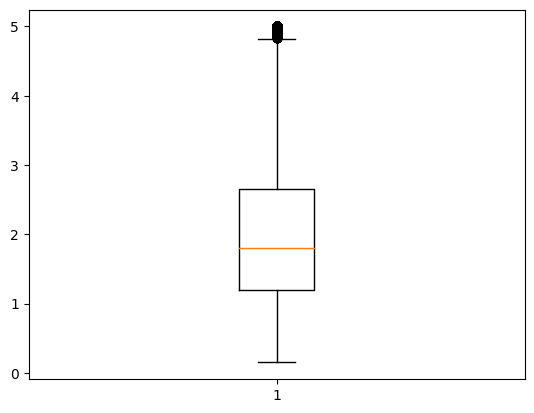

In [ ]:
plt.boxplot(data["MedHouseVal"])

We can see that there are outliers present.

We will calculate and display the correlation matrix. Based on the obtained values, we will make conclusions and remove features accordingly. After that, we will split the dataset again, build the model, and calculate the metrics.

In [ ]:
import seaborn as sns

In [ ]:
corr = data.corr()

In [ ]:
corr.style.background_gradient(cmap='RdYlGn')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


We can see that the highest correlation (0.847621) is between the features AveBedrms and AveRooms. Therefore, we can remove one of these features.

In [ ]:
X1 = data[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]

In [ ]:
y1 = data['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_train

0.5353477913864823

In [ ]:
rmse_test = mean_squared_error(y_test, y_pred_test)
rmse_test

0.5473264990498136

In [ ]:
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.5995238502055928

In [ ]:
r2_test = r2_score(y_test, y_pred_test)
r2_test

0.5823239094526445

The model's performance did not change much.

Let's examine the remaining features for outliers and remove any outliers if found. Then, we will split the dataset again, build the model, and calculate the metrics.

In [ ]:
data1 = data[['MedInc', 'HouseAge', 'AveRooms',  'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14e9f38940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14e9f38e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14e9f386a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f14e9f393c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f14e9f39660>],
 'means': []}

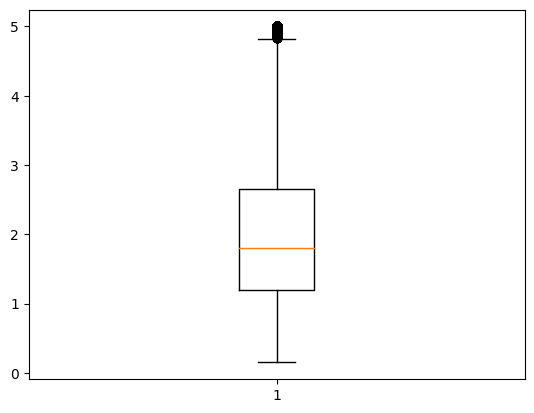

In [ ]:
plt.boxplot(data1["MedHouseVal"])

In [ ]:
data1 = data1[data1.MedHouseVal < 4.7]

In [ ]:
X2 = data1[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]

In [ ]:
y2 = data1['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_train

0.39110282806990876

In [ ]:
rmse_test = mean_squared_error(y_test, y_pred_test)
rmse_test

0.382346689244797

In [ ]:
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.5567144456393807

In [ ]:
r2_test = r2_score(y_test, y_pred_test)
r2_test

0.5782141336815032

We see that the model's performance has worsened, which means that removing outliers was not advisable.

Three classification models were trained: one using all unchanged features, one using features selected based on correlation values, and one using features selected based on correlation values with outliers removed. The RMSE and R² metrics for the models were computed. After removing one of the features, the model's performance changed little, while removing outliers led to a deterioration in performance.